# Data Wrangling

In [58]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# loading the drivers data

drivers = pd.read_json('ultimate_data_challenge.json')
drivers.head(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0


In [60]:
# Sorting the data by signup data to find the earliest signup date

drivers.sort_values(by='signup_date', ascending=True).head(3)

# Earliest signup_date 2014-01-01

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
4674,Astapor,2,2014-01-01,NaN,1.0,2014-06-28,iPhone,0.0,False,0.0,4.03,4.0
7672,Winterfell,1,2014-01-01,NaN,1.0,2014-01-01,iPhone,0.0,True,100.0,3.39,5.0
1431,Winterfell,0,2014-01-01,NaN,1.0,2014-06-08,iPhone,0.0,True,66.7,9.76,5.0


# Handling Missing Values

In [61]:
# Any null values

drivers.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [62]:
# Dropping null values

drivers = drivers.dropna()
drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'trips_in_first_30_days'}>,
        <AxesSubplot:title={'center':'avg_rating_of_driver'}>,
        <AxesSubplot:title={'center':'avg_surge'}>],
       [<AxesSubplot:title={'center':'surge_pct'}>,
        <AxesSubplot:title={'center':'weekday_pct'}>,
        <AxesSubplot:title={'center':'avg_dist'}>],
       [<AxesSubplot:title={'center':'avg_rating_by_driver'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

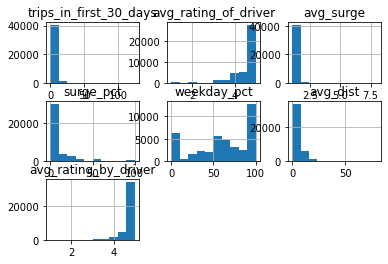

In [63]:
# a quick overview of the distribution of the numerical columns

drivers.hist()

[Text(0.5, 0, 'Average Rating of Drivers by Customers'),
 Text(0, 0.5, 'Number of Customers'),
 Text(0.5, 1.0, 'Distribution of Ratings by Customers')]

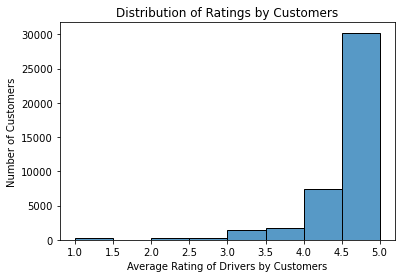

In [64]:
# Majority of ratings by customers are 5 points

fig, ax = plt.subplots()
ax = sns.histplot(data=drivers, x='avg_rating_of_driver', bins=8)
ax.set(xlabel='Average Rating of Drivers by Customers', 
       ylabel='Number of Customers', title='Distribution of Ratings by Customers')



[Text(0.5, 0, 'Average Rating of Customers by Drivers'),
 Text(0, 0.5, 'Number of Drivers'),
 Text(0.5, 1.0, 'Distribution of Ratings by Drivers')]

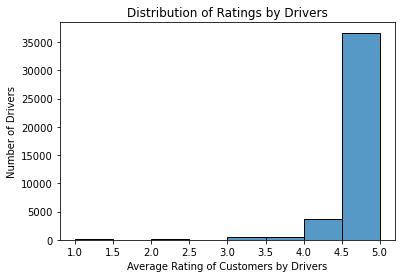

In [65]:
# Majority of rating by drivers are also 5.

fig, ax = plt.subplots()
ax = sns.histplot(data=drivers, x='avg_rating_by_driver', bins=8)
ax.set(xlabel='Average Rating of Customers by Drivers', 
       ylabel='Number of Drivers', title='Distribution of Ratings by Drivers')

Most drivers and customers seem to give a 5 rating. 
However, drivers seem to rate customers a little higher than customers rating drivers.

0.2926829268292683


[Text(0.5, 0, 'Percentage of Weekday Trips'),
 Text(0, 0.5, 'Number of Drivers'),
 Text(0.5, 1.0, "Distribution of Drivers' Percentage of Weekday Trips")]

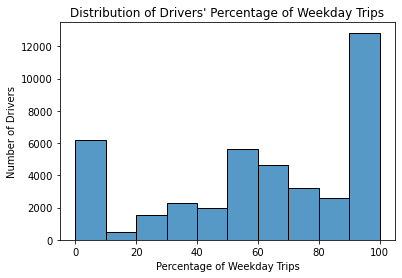

In [66]:
print(12000/41000)
# Some 12,000 drivers (about 29% of drivers) work 98% or more of their time in the weekdays.

import seaborn as sns
ax = sns.histplot(data=drivers, x="weekday_pct", bins=10)
ax.set(xlabel='Percentage of Weekday Trips',
       ylabel='Number of Drivers',
       title="Distribution of Drivers' Percentage of Weekday Trips")

In [67]:
drivers[drivers['weekday_pct'] > 98]['weekday_pct'].count()

12089

Some 12,000 drivers (about 29%) drive mostly during the weekdays.
Some 6,000 drivers (about 15%) drive mostly in the weekends.
The rest of the drivers divide their driving time between weekdays and weekends.

In [68]:
drivers[drivers['weekday_pct'] < 2]['weekday_pct'].count()

6172

# Retained Drivers

In [69]:
drivers['signup_date'] = pd.to_datetime(drivers['signup_date'])
drivers['signup_date'].head()

0   2014-01-25
1   2014-01-29
2   2014-01-06
3   2014-01-10
4   2014-01-27
Name: signup_date, dtype: datetime64[ns]

In [70]:
drivers['last_trip_date'] = pd.to_datetime(drivers['last_trip_date'])
drivers['last_trip_date'].head()

0   2014-06-17
1   2014-05-05
2   2014-01-07
3   2014-06-29
4   2014-03-15
Name: last_trip_date, dtype: datetime64[ns]

In [71]:
# a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

In [72]:
drivers.sort_values(by='last_trip_date', ascending=False).head()
# Latest last trip date = 2014-07-01. I am assuming this is the date the data was taken.

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
24275,King's Landing,7,2014-01-08,4.8,1.00,2014-07-01,iPhone,0.0,True,67.6,2.17,4.7
23681,Astapor,5,2014-01-21,3.1,1.02,2014-07-01,iPhone,7.1,True,75.0,3.14,4.4
4385,King's Landing,0,2014-01-06,4.6,1.08,2014-07-01,iPhone,13.9,True,77.8,2.58,4.7
45155,Winterfell,3,2014-01-28,4.8,1.03,2014-07-01,iPhone,5.7,False,66.0,5.24,4.6
38661,Winterfell,4,2014-01-18,4.4,1.16,2014-07-01,iPhone,28.1,False,65.6,4.07,4.7


In [73]:
# Latest trip date. I will take this as the current date, i.e. the date the data was taken.
drivers['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [74]:
drivers['days_since_last_trip'] = (drivers['last_trip_date'].max() - drivers['last_trip_date']).dt.days
drivers.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108


In [75]:
drivers['retained'] = drivers['days_since_last_trip'] <= 30

In [76]:
drivers.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108,False


In [77]:
drivers['retained'].value_counts(normalize=True)

False    0.588973
True     0.411027
Name: retained, dtype: float64

Only 41% of the drivers are retained.

# Preparing the data for modeling

### Categorical Columns

In [78]:
drivers['city'].value_counts()

Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

In [79]:
drivers['phone'].value_counts()

iPhone     29352
Android    12093
Name: phone, dtype: int64

In [80]:
drivers['ultimate_black_user'] = drivers['ultimate_black_user'].replace({True: 1, False: 0})
drivers['retained'] = drivers['retained'].replace({True: 1, False: 0})
drivers.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,14,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,57,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,175,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,2,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,108,0


In [81]:
# One-Hot Encoding city and phone columns

cat_cols = ['city', 'phone']
df = pd.get_dummies(drivers, prefix=['city_', 'phone_'], columns=cat_cols)

In [82]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,retained,city__Astapor,city__King's Landing,city__Winterfell,phone__Android,phone__iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,14,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,57,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,175,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,2,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,108,0,0,0,1,1,0


In [83]:
# Dropping unneeded columns

df = df.drop(columns=['signup_date', 'last_trip_date', 'days_since_last_trip'], axis=1)

In [84]:
df.head(3)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city__Astapor,city__King's Landing,city__Winterfell,phone__Android,phone__iPhone
0,4,4.7,1.1,15.4,1,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.0,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.0,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1


# Standardizing Numeric Columns

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

to_standardize = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 
                  'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

scaler.fit(df[to_standardize])
df[to_standardize] = scaler.transform(df[to_standardize])

In [86]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city__Astapor,city__King's Landing,city__Winterfell,phone__Android,phone__iPhone
0,0.342505,0.159520,0.131718,0.354838,1,-0.432445,-0.347912,0.552529,1,0,1,0,0,1
1,-0.642890,0.646456,-0.371440,-0.485689,0,-0.323292,0.544197,0.552529,0,1,0,0,1,0
2,0.096156,-0.489729,-0.371440,-0.485689,0,1.112936,-0.911554,0.552529,0,1,0,0,0,1
3,1.574248,-0.002792,0.332981,0.605905,1,0.538445,-0.602523,0.305372,1,0,1,0,0,1
4,2.805992,-0.327417,0.584560,0.158351,0,0.607384,-0.452866,0.305372,0,0,0,1,1,0


# Dividing the data into training and test set

In [87]:
X = df.drop(columns='retained', axis=1)
y = df['retained']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [89]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29011, 13) (12434, 13) (29011,) (12434,)


# Model 1 - Graident Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
y_pred_proba_gb = gb.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
print(roc_auc_score(y_test, y_pred_proba_gb))

0.8554731346360349


In [92]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)

[[6150 1143]
 [1571 3570]]


# Model 2 Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [94]:
y_pred_proba_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
print(roc_auc_score(y_test, y_pred_proba_rf))

0.8212610205985266


In [95]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[5813 1480]
 [1581 3560]]


In [96]:
print(y_pred_proba_gb)

[0.60464251 0.08996432 0.92355013 ... 0.19346809 0.16533576 0.64175966]


# Choosing the best model
After comparing the ROC/AUC score and the confusion matrix for the two models, I can clearly see that the Gradient Boosting Classifier performs better.